# Homework w03d04 - Ridge regression and the Lasso

Use again the auto dataset. We want to predict mpg using all features except name.
1. Split the dataset into a training set and a test set. 
2. Use lm = linear_model.LinearRegression(alpha=a) to perform a ridge regression fit for a range of cost paremeters. Obtain the mean squared error for each case.
3. Use lm = linear_model.Lasso(alpha=a) to perform a fit with the Lasso for a range of cost parameters. Obtain the mean squared error for each case.
4. Which one performs best?

5. Optional: Have a look at the regression coefficients with lm.coef_.

Hints: 
1. You can cover a range of alphas by choosing them from the list alphas = np.logspace(start=-10, stop=10, num=21) which contains num logarithmically spaced values between $10^{start}$ and  $10^{stop}$. You can display the value of alpha used in your fit with lm.alpha_.

1. The mean squared error is obtained with mean_absolute_error.

In [1]:
# load libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import feature_selection, linear_model

# read in data
df = pd.read_csv('w03d01/Auto.csv')
# drop missing values and convert datatype
df.dropna(inplace=True)
df.drop(list(df.index[df.horsepower=='?']),inplace=True)
df.horsepower = df.horsepower.astype(int)

In [2]:
X = df.iloc[:,1:-1]
y = df.mpg

Define your response y and feature matrix X and 
use the train_test_split function to split the data set into a training and a test set.
Use 20 percent of the original dataset as the test set.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [8]:
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "r^2:", model.score(X, y), 'MSE: ', mean_squared_error(y, lm.predict(X))
#get_linear_model_metrics(X, y, lm)

r^2: 0.821478076481 MSE:  10.847480945


alpha: 1e-10
Coefficients:  [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
MSE:  10.847480945 r^2: 0.821478076481

alpha: 1e-09
Coefficients:  [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
MSE:  10.847480945 r^2: 0.821478076481

alpha: 1e-08
Coefficients:  [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
MSE:  10.847480945 r^2: 0.821478076481

alpha: 1e-07
Coefficients:  [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.42614049]
MSE:  10.847480945 r^2: 0.821478076481

alpha: 1e-06
Coefficients:  [-0.49337631  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.42614049]
MSE:  10.847480945 r^2: 0.821478076481

alpha: 1e-05
Coefficients:  [-0.49337626  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.42614039]
MSE:  10.847480945 r^2: 0.821478076481

alpha: 0.0001
Coefficients:  [-0.49337574  0.01989563 -0.01695113 -0.0

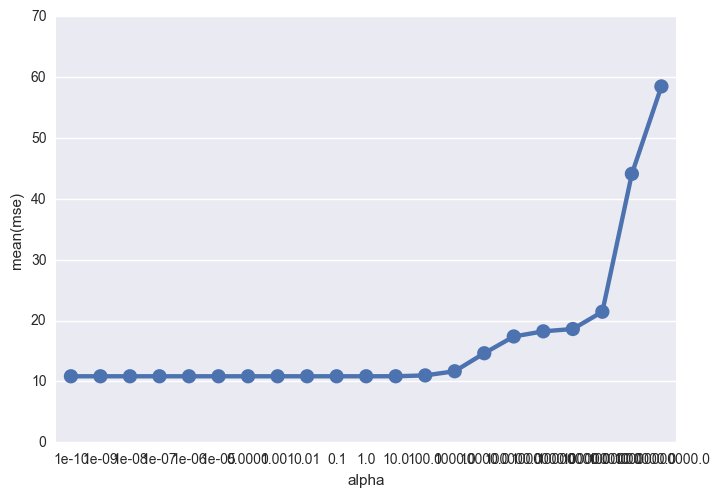

In [9]:
# For each alpha, fit Ridge regression model to data, print MSE
alphas = np.logspace(start=-10, stop=10, num=21)
mse = []
for a in alphas:
    print 'alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(X, y)
    print 'Coefficients: ', lm.coef_
    mse.append(mean_squared_error(y, lm.predict(X)))
    print 'MSE: ', mse[-1], 'r^2:', lm.score(X,y)
    print

sns.pointplot(x="alpha", y="mse", data=pd.DataFrame({'alpha': alphas, 'mse': mse}))

Alpha: 1e-10
Coefficients:  [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
MSE:  10.847480945 r^2: 0.821478076481

Alpha: 1e-09
Coefficients:  [-0.49337631  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.42614049]
MSE:  10.847480945 r^2: 0.821478076481

Alpha: 1e-08
Coefficients:  [-0.49337628  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.42614046]
MSE:  10.847480945 r^2: 0.821478076481

Alpha: 1e-07
Coefficients:  [-0.49337591  0.01989563 -0.01695114 -0.00647404  0.08057581  0.75077267
  1.42614019]
MSE:  10.847480945 r^2: 0.821478076481

Alpha: 1e-06
Coefficients:  [-0.49337228  0.01989556 -0.01695112 -0.00647404  0.08057557  0.75077259
  1.4261374 ]
MSE:  10.847480945 r^2: 0.821478076481

Alpha: 1e-05
Coefficients:  [-0.49333606  0.01989477 -0.01695091 -0.00647405  0.08057316  0.7507718
  1.42610956]
MSE:  10.8474809458 r^2: 0.821478076469

Alpha: 0.0001
Coefficients:  [-0.492974    0.01988691 -0.0169488  -0.0

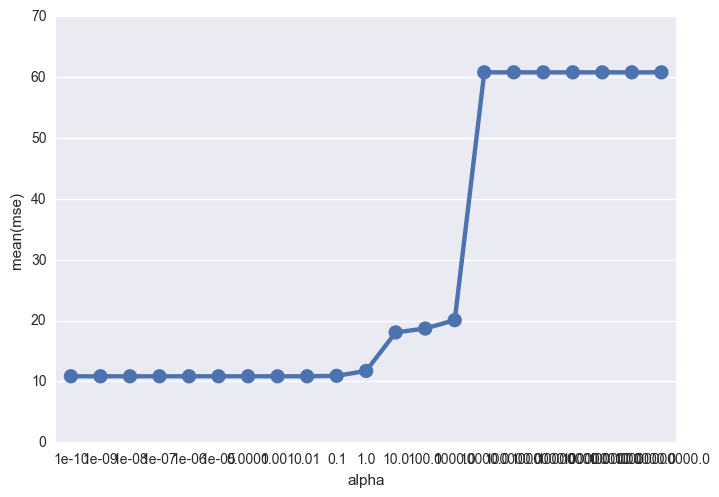

In [36]:
# For each alpha, fit Ridge regression model to data, print MSE
alphas = np.logspace(start=-10, stop=10, num=21)
mse = []
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Lasso(alpha=a)
    lm.fit(X, y)
    print 'Coefficients: ', lm.coef_
    mse.append(mean_squared_error(y, lm.predict(X)))
    print 'MSE: ', mse[-1], 'r^2:', lm.score(X,y)
    print

ax = sns.pointplot(x="alpha", y="mse", data=pd.DataFrame({'alpha': alphas, 'mse': mse}))
#ax.set(xscale="log")
#ax.set_xticks(np.arange(1,4,1))#set(xticklabels=[10**i for i in range(-20,20,5)])

In [11]:
mse

[10.847480945000449,
 10.847480945000449,
 10.847480945000449,
 10.847480945000529,
 10.847480945008057,
 10.847480945759502,
 10.847481020827363,
 10.847488601836762,
 10.848240481447585,
 10.923225340834794,
 11.730398689270192,
 18.05393307068249,
 18.69051235338253,
 20.066192193742278,
 60.762738442315708,
 60.762738442315708,
 60.762738442315708,
 60.762738442315708,
 60.762738442315708,
 60.762738442315708,
 60.762738442315708]